## Assignment 2

This assignmemt is based on content discussed in module 2 and will work on a solution for the famous Monty Hall game.  Retrieved from https://en.wikipedia.org/wiki/Monty_Hall_problem


## Learning outcomes

- Program a simple simulation to solve a concrete statistical problem
- Develop insight into the Bayesian probabilistic viewpoint
- Recognize that statistical intuition can sometimes be wrong


**Question**

Given below is the description of the problem.  

Suppose you're on a game show and you're given the choice of three doors. 

Behind one door is a car; behind the others, goats. The car and the goats were placed randomly behind the doors before the show.

The rules are:

After you have chosen a door, the door remains closed for the time being. 
The game show host, Monty Hall, who knows what is behind the doors, now has to open one of the two remaining doors, and the door he opens must have a goat behind it. If both remaining doors have goats behind them, he chooses one randomly. 

After Monty opens a door with a goat, he will ask you to decide whether you want to stay with your first choice or to switch to the last remaining door. 
Imagine that you chose Door 1 and the host opens Door 3, which has a goat. 
He then asks you "Do you want to switch to Door Number 2?" Is it to your advantage to change your choice? 

**NOTES:**
1. The player may initially choose any of the three doors (not just Door 1).
2. The host opens a different door revealing a goat (not necessarily Door 3).
3. The host gives the player a second choice between the two remaining unopened doors. 


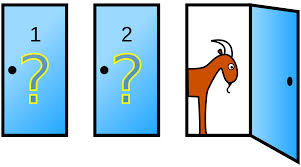

(Source: https://en.wikipedia.org/wiki/Monty_Hall_problem#)

- Write Python code to solve the Monty Hall problem. Simulate at least a thousand games using three doors for each strategy and show the results in such a way as to make it easy to compare the effects of each strategy.


## Name: Paulo Santiago

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from random import choice
from random import sample
from random import randint
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

In [2]:
# Create list of doors numbered 1 to 3
doors_list = [1,2,3]

In [3]:
def monty_hall_problem(doors, switch_choice):

    doors_remaining = doors.copy()
    #print('doors_remaining', doors_remaining)
    
    # set win to False by default
    win = False
    # player randomly selects door
    player_choice = choice(doors)
    # randomly select winning door
    winning_door = choice(doors)
    #print('winning_door', winning_door)
    #print('player_choice', player_choice)
    
    #print('doors', doors, 'player_choice', player_choice, 'switch_choice', switch_choice)
    
    # host removes losing door
    for door in doors:
        #print('door loop', door)
        #print('door != player_choice', door != player_choice, 'door != winning_door', door != winning_door)
        # check if door is not the player's choice and winning door
        if (door != player_choice and door != winning_door):
            doors_remaining.remove(door)
            #print('removed losing door 1', doors_remaining)
            # end the loop once removed
            break
    
    #print('removed losing door 2', doors_remaining)
    
    # player switches choice if they decide to
    if (switch_choice):
        # remove player's original choice from the remaining doors
        doors_remaining.remove(player_choice)
        #print('doors_remainig after switch', doors_remaining)
        
        # player chooses from remaining door(s)
        player_choice = choice(doors_remaining)
        #for door in doors_remaining:
        #    if (door != player_choice):
        #        player_choice = door
        #        break
        
        #player_choice = choice(doors_remaining)
        #print('player switch', player_choice)
    
    
    # check if player choice is the same as winning door
    if (player_choice == winning_door):
        win = True
    else:
        win = False
    
    # return if player wins
    return win
    
#print(monty_hall_problem(doors_list, True))

In [4]:
# number of samples
samples = 1000

# array of wins and losses
# 1 = win, 0 = lose
no_switch_wins_list = []
switch_wins_list = []

# run a simulation 1000 times and keep track of wins and losses
for i in range(samples):
    if (monty_hall_problem(doors_list, False)):
        no_switch_wins_list.append(1)
    else:
        no_switch_wins_list.append(0)
        
    if (monty_hall_problem(doors_list, True)):
        switch_wins_list.append(1)
    else:
        switch_wins_list.append(0)
        
# number of wins for not switching choice
no_switch_wins = sum(no_switch_wins_list)
# number of wins for switching choice
switch_wins = sum(switch_wins_list)

#print('no_switch_wins', no_switch_wins)
#print('test_no', test_no)
#print('switch_wins', switch_wins)
#print('test_yes', test_yes)
        
#print('switch list', switch_wins_list)
        
no_switch_win_percentage_list = []
switch_win_percentage_list = []

n_test = []

#test = no_switch_wins_list[:4]
#print('test', test)
for i in range(samples):
    #print('i', i)
    #print('i', no_switch_wins_list[:i+1])
    no_switch_percentage = sum(no_switch_wins_list[:i+1]) / (i + 1)
    #print('%', no_switch_percentage)
    no_switch_win_percentage_list.append(no_switch_percentage)
    
    #print('test', switch_win_percentage_list[i])
    switch_win_percentage = sum(switch_wins_list[:i+1]) / (i + 1)
    switch_win_percentage_list.append(switch_win_percentage)
    #print('% switch', switch_win_percentage)
    
    n_test.append(i + 1)
    
#print('n_test', n_test)


In [5]:
no_switch_win_percentage = (no_switch_wins / samples) * 100

switch_win_percentage = (switch_wins / samples) * 100

print('After running 1000 simulations of a player not switching their choice, they won {0} with a win percentage of {1}%.'.format(no_switch_wins, no_switch_win_percentage))
print('After running 1000 simulations of a player switching their choice, they won {0} with a win percentage of {1}%.'.format(switch_wins, switch_win_percentage))

After running 1000 simulations of a player not switching their choice, they won 352 with a win percentage of 35.199999999999996%.
After running 1000 simulations of a player switching their choice, they won 671 with a win percentage of 67.10000000000001%.


## Player Does Not Switch Original Choice

<AxesSubplot:title={'center':'Monty Hall Problem (Player Does Not Switch Original Choice)'}, xlabel='Win and Loses', ylabel='Count'>

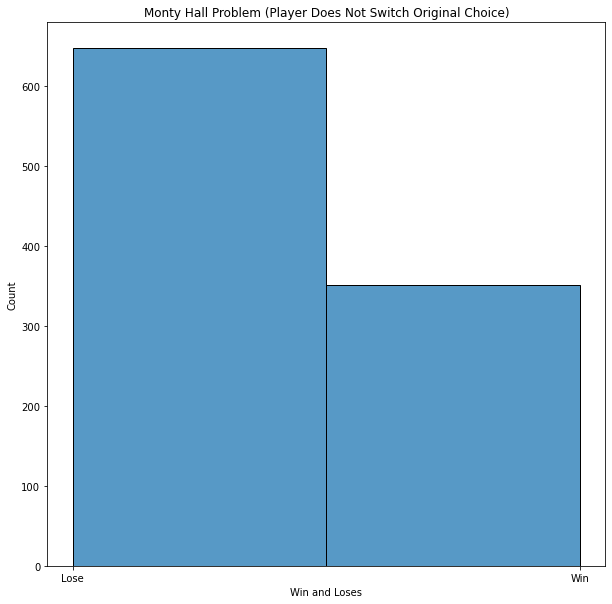

In [6]:
plt.figure(figsize=(10,10))
no_switch_distribution = sns.histplot(no_switch_wins_list, bins = 2)
no_switch_distribution.set_xticks(range(2))
no_switch_distribution.set_xticklabels(['Lose', 'Win'])
no_switch_distribution.set(xlabel="Win and Loses", ylabel="Count", title="Monty Hall Problem (Player Does Not Switch Original Choice)")
no_switch_distribution

In [7]:
md1 = "Simulating the Monty Hall problem and looking at the bar graph, when the player keeps their original choice and does not switch to the other door, they lose {0} and win {1} times.".format(no_switch_wins, samples - no_switch_wins)
md2 = "By keeping their original choice, the player has a {}% chance of winning".format(no_switch_win_percentage)
md = md1 + md2
md

'Simulating the Monty Hall problem and looking at the bar graph, when the player keeps their original choice and does not switch to the other door, they lose 352 and win 648 times.By keeping their original choice, the player has a 35.199999999999996% chance of winning'

Text(0.5, 1.0, 'Monty Hall Problem (Player Does Not Switch Original Choice)')

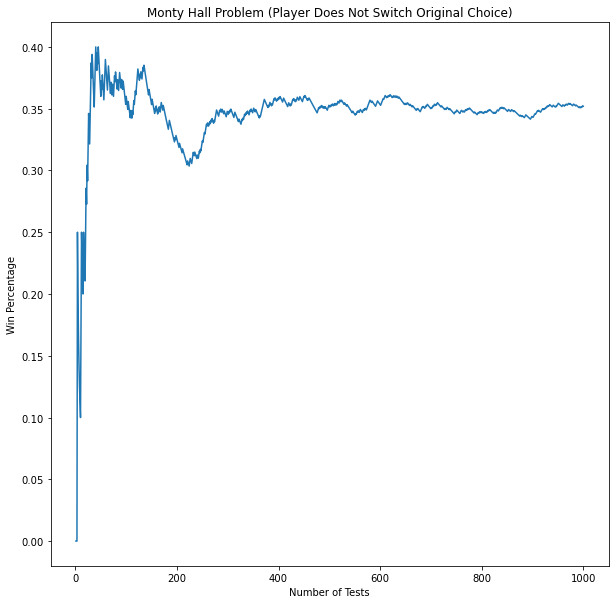

In [8]:
plt.figure(figsize=(10,10))
plt.plot(n_test, no_switch_win_percentage_list)
plt.xlabel("Number of Tests")
plt.ylabel("Win Percentage")
plt.title("Monty Hall Problem (Player Does Not Switch Original Choice)")
#no_switch_win_percentage_plt

After running 1000 simulations of the Monty Hall Problem when the player does not switch their initial choice, we can see that the win percentage is really volatile from the first to about three hundred simulations. Once more simulations are conducted, the average win percentage converges to its expected value of 0.3333 or 33.33%.

## Player Switches Original Choice

<AxesSubplot:title={'center':'Monty Hall Problem (Player Switches Original Choice)'}, xlabel='Win and Loses', ylabel='Count'>

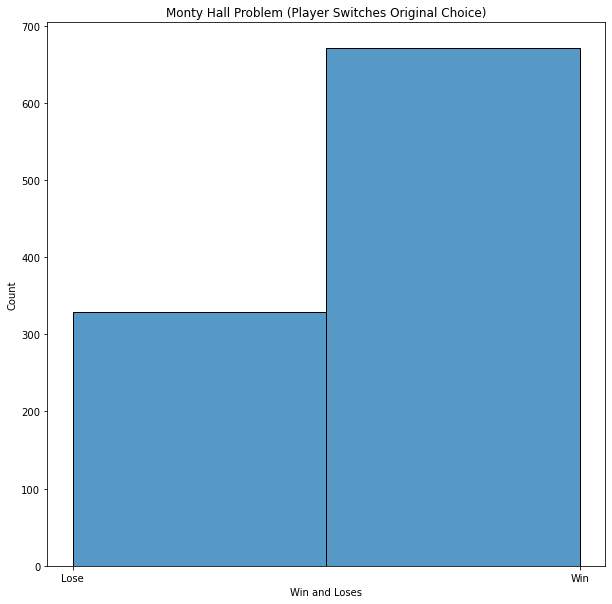

In [9]:
plt.figure(figsize=(10,10))
switch_distribution = sns.histplot(switch_wins_list, bins = 2)
switch_distribution.set_xticks(range(2))
switch_distribution.set_xticklabels(['Lose', 'Win'])
switch_distribution.set(xlabel="Win and Loses", ylabel="Count", title="Monty Hall Problem (Player Switches Original Choice)")
switch_distribution

In [10]:
md1 = "Simulating the Monty Hall problem and looking at the bar graph, when the player switches their original choice and chooses the other door, they lose {0} and win {1} times.".format(switch_wins, samples - switch_wins)
md2 = "By changing their original choice, the player has a {}% chance of winning".format(switch_win_percentage)
md = md1 + md2
md

'Simulating the Monty Hall problem and looking at the bar graph, when the player switches their original choice and chooses the other door, they lose 671 and win 329 times.By changing their original choice, the player has a 67.10000000000001% chance of winning'

Text(0.5, 1.0, 'Monty Hall Problem (Player Switches Original Choice)')

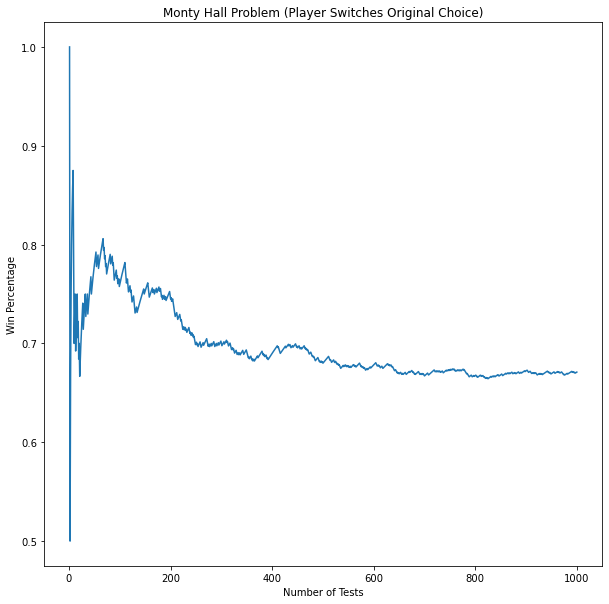

In [11]:
plt.figure(figsize=(10,10))
plt.plot(n_test, switch_win_percentage_list)
plt.xlabel("Number of Tests")
plt.ylabel("Win Percentage")
plt.title("Monty Hall Problem (Player Switches Original Choice)")
#no_switch_win_percentage_plt

After running 1000 simulations of the Monty Hall Problem when the player switches their initial choice, we can see that the win percentage is really volatile from the first to about three hundred simulations. Once more simulations are conducted, the average win percentage converges to its expected value of 0.6666 or 66.66%.

## Analysis

Running 1000 simulations of the Monty Hall Problem with both choices: Player keep their original choice and player switches to the other door, we can see that the Central Limit Theorem comes into effect. Once many simulations are conducted, the win percentage approaches its mean or expected value. When a player keeps their original door and does not switch, the player's win percentage approaches 0.3333 or 33.33%. When a player switches their original choice to the last remaining door, their win percentage approaches 0.6666 or 66.66%. Therefore, we can conclude that switching your original choice to the last door is statistically the best play.